In [2]:
from O.interface import *

## The remote/expensive-energy-evaluations functionality was tested here in two cases. Veliparib Form I with 8 molecules and Succinic Acid Forms alpha beta gamma with 16 molecules. Both tests used 60,000 MD datapoints sampled in each macrostate, to mimic a low data regime. This MD data is however ergodic, which is the main requirement for reliable reweighting. 

### Please find notes near inputs to NN_interface_sc_multimap_selective_evaluation_ (function) for details about the inputs. 

In [13]:
"""
## ##

the same as the other notebook but using less FF evaluations

this is only relevant for an expensive FF (u_) where training is usually on a small amount of data (r).

When training on small amount of data, model during training is mostly not good, except at the region
where the model minimises validation error.
The region of lowest validation error is the only regions where the model is evaluated here.
n_selective_evalautions is the number of random validation batches that are used in that region to solve BAR (raw).
The forecefield is evalauted at the end, and separately from training, to complete the pymbar inputs.
The final FE is averaged from n_selective_evalautions number of (raw) estimates.

""";

In [2]:
nn = NN_interface_sc_multimap_selective_evaluation(
                name = 'veliparib_I_111_trying_small_dataset_selective_eval',
                paths_datasets = ['./O/MM/GAFF_sc/veliparib/data/veliparib_dataset_I_NVT_cell_111_CUT',],
                running_in_notebook = True,
                training = True,
                model_class = PGMcrys_v1,
)

# initialise_object (SingleComponent) with GAFF FF, from the input file (PDB):
 ./O//MM/GAFF_sc/veliparib/veliparib_I_equilibrated_cell_111.pdb
n_molecules: 8

# initialise_system:
set PME cutoff to: 0.36 nm
removeCMMotion active: True

__ changing n_mol in top: ________________________________
in the /mnt/c/Users/User/Desktop/FEcrys/O/MM/GAFF_sc/veliparib/misc/x_veliparib_gmx.top
replaced 1 line ( 399 ) 
 from: 
     UNK                  1
 to 
     UNK                  8
these changes were written into file: /mnt/c/Users/User/Desktop/FEcrys/O/MM/GAFF_sc/veliparib/misc/x_x_veliparib_gmx.top
__________________________________________________________

set SwitchingFunction to 0.95 * PME_cutoff = 0.34199999999999997 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
no corrections to self.system
n_mol =  8, n_atoms_mol = 34, N = 272, n_DOF = 813 (n_constraints = 3) 

# initialise_simulation:
set temperature: 300 Kelvin
set integration timestep: 0.002 ps
set collision rate (friction ce

In [ ]:
# (the rest of the steps):

In [5]:
nn.set_ic_map_step1(ind_root_atom=5, option=0)
nn.set_ic_map_step2(check_PES=True)
nn.set_ic_map_step3(n_mol_unitcells=[8,])
nn.set_model(n_layers = 4, learning_rate=0.001, n_att_heads=4,
             evaluation_batch_size=5000)

molecule with 34 atoms, of which 18 are heavy atoms, and the rest are 16 hydrogens.
atoms with incides [5, 10, 1] are set to be the Cartesian_Block
position of the molecule specified by atoms with index: 5
rotation of the molecule specified by atoms with indices: [10, 1]
conformation of the molecule specified by all other atoms.
COM removed from data without taking into account PBC of the box
inds_rand attempt: 1
! not found
inds_rand attempt: 2
! not found
inds_rand attempt: 3
! not found
inds_rand attempt: 4
! not found
inds_rand attempt: 5
! not found
inds_rand attempt: 6
found !
checking that PES matches the sampled dataset:
errT: 2.5822637561475403e-05 -0.0036737386690219864 0.0034337032478788387
errV: -3.9390665217268863e-05 -0.004138748969751305 0.003740569297235652
initialising on 60000 datapoints provided
SCmap.initalise_ : a single box provided -> Cartesian transformed by SCmap.
3 out of 248 potentially periodic marginal variables are set to periodic
This topology is shared o

In [6]:
nn.set_trainer(n_batches_between_evaluations=50)

'43.76 999 999 19 AVMD_T:[358.41722654] AVMD_V:[353.7077048054242] || FE:[0.0] SD:[0.0]'

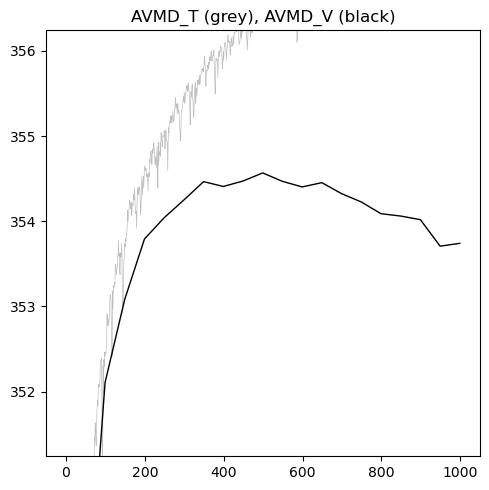

training time so far: 43.94 minutes
saved ./O//NN/training_results/misc/veliparib_I_111_trying_small_dataset_selective_eval_SC__misc_
misc training outputs were saved


In [8]:
nn.train(   n_batches = 1000,
            f_halfwindow_visualisation = [2.5, 1.],
        )

In [ ]:
# this is also a cpu run
# not sure why the training time is longer than in the first notebook, while doing less computations overall.
# the installations on this laptop changed since the last time.
# maybe saving of 5000 supercell coordinates every 50 batches makes everything slower; this part is necessary here.

In [4]:
nn.load_misc_()

# 5 * 5000 FF evalautions:

In [10]:
nn.solve_BAR_using_pymbar_(n_selective_evalautions=5)


two-state BAR evaluation in macrostate 0:
evalaution batch 9: evaluating potential energies on model samples. The estimate will be saved.



******* JAX 64-bit mode is now on! *******
*     JAX is now set to 64-bit mode!     *
*   This MAY cause problems with other   *
*      uses of JAX in the same code.     *
******************************************

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


evalaution batch 8: evaluating potential energies on model samples. The estimate will be saved.
evalaution batch 10: evaluating potential energies on model samples. The estimate will be saved.
evalaution batch 6: evaluating potential energies on model samples. The estimate will be saved.
evalaution batch 12: evaluating potential energies on model samples. The estimate will be saved.
saved ./O//NN/training_results/BAR/veliparib_I_111_trying_small_dataset_selective_eval_SC__BAR__BAR_output_crystal_index=0
saved BAR result


     grid search estimate (kT) : 0.0              +/- standard deviation : 0.0                      
     final pymbar result  (kT) : 357.7243         +/- standard error     : 0.0907      


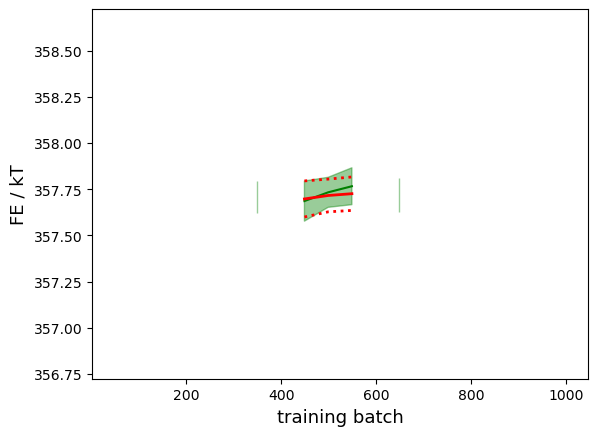

In [6]:
nn.plot_result_(n_mol=8)

# 10 * 5000 FF evalautions:

In [12]:
nn.solve_BAR_using_pymbar_(n_selective_evalautions=10)

found saved BAR result
rerun = True

two-state BAR evaluation in macrostate 0:
evalaution batch 7: evaluating potential energies on model samples. The estimate will be saved.
evalaution batch 11: evaluating potential energies on model samples. The estimate will be saved.
evalaution batch 13: evaluating potential energies on model samples. The estimate will be saved.
evalaution batch 5: evaluating potential energies on model samples. The estimate will be saved.
evalaution batch 14: evaluating potential energies on model samples. The estimate will be saved.
saved ./O//NN/training_results/BAR/veliparib_I_111_trying_small_dataset_selective_eval_SC__BAR__BAR_output_crystal_index=0
saved BAR result


     grid search estimate (kT) : 0.0              +/- standard deviation : 0.0                      
     final pymbar result  (kT) : 357.7221         +/- standard error     : 0.0973      


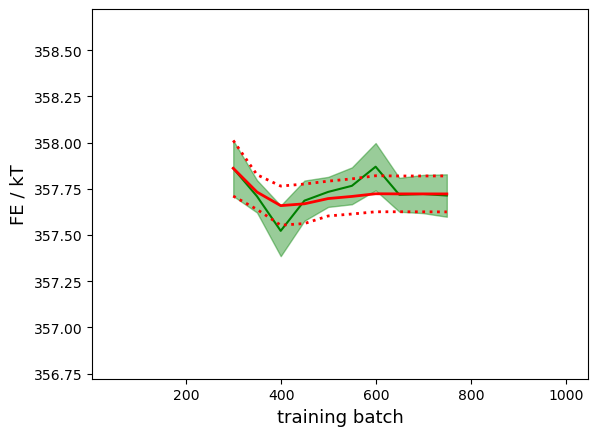

In [8]:
nn.plot_result_(n_mol=8)

In [ ]:
# the only energies that were evaluated (10 lines: 10 batches, each batch 5000 samples from the model):

In [10]:
nn.load_energies_during_training_()

V estimate0skipped
V estimate1skipped
V estimate2skipped
V estimate3skipped
V estimate4skipped
V estimate15skipped
V estimate16skipped
V estimate17skipped
V estimate18skipped
V estimate19skipped
T estimate19skipped

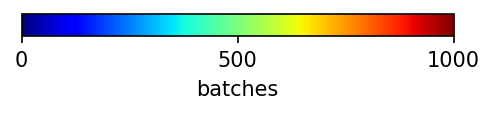

(-338.72615681944717, -38.7261568194472)

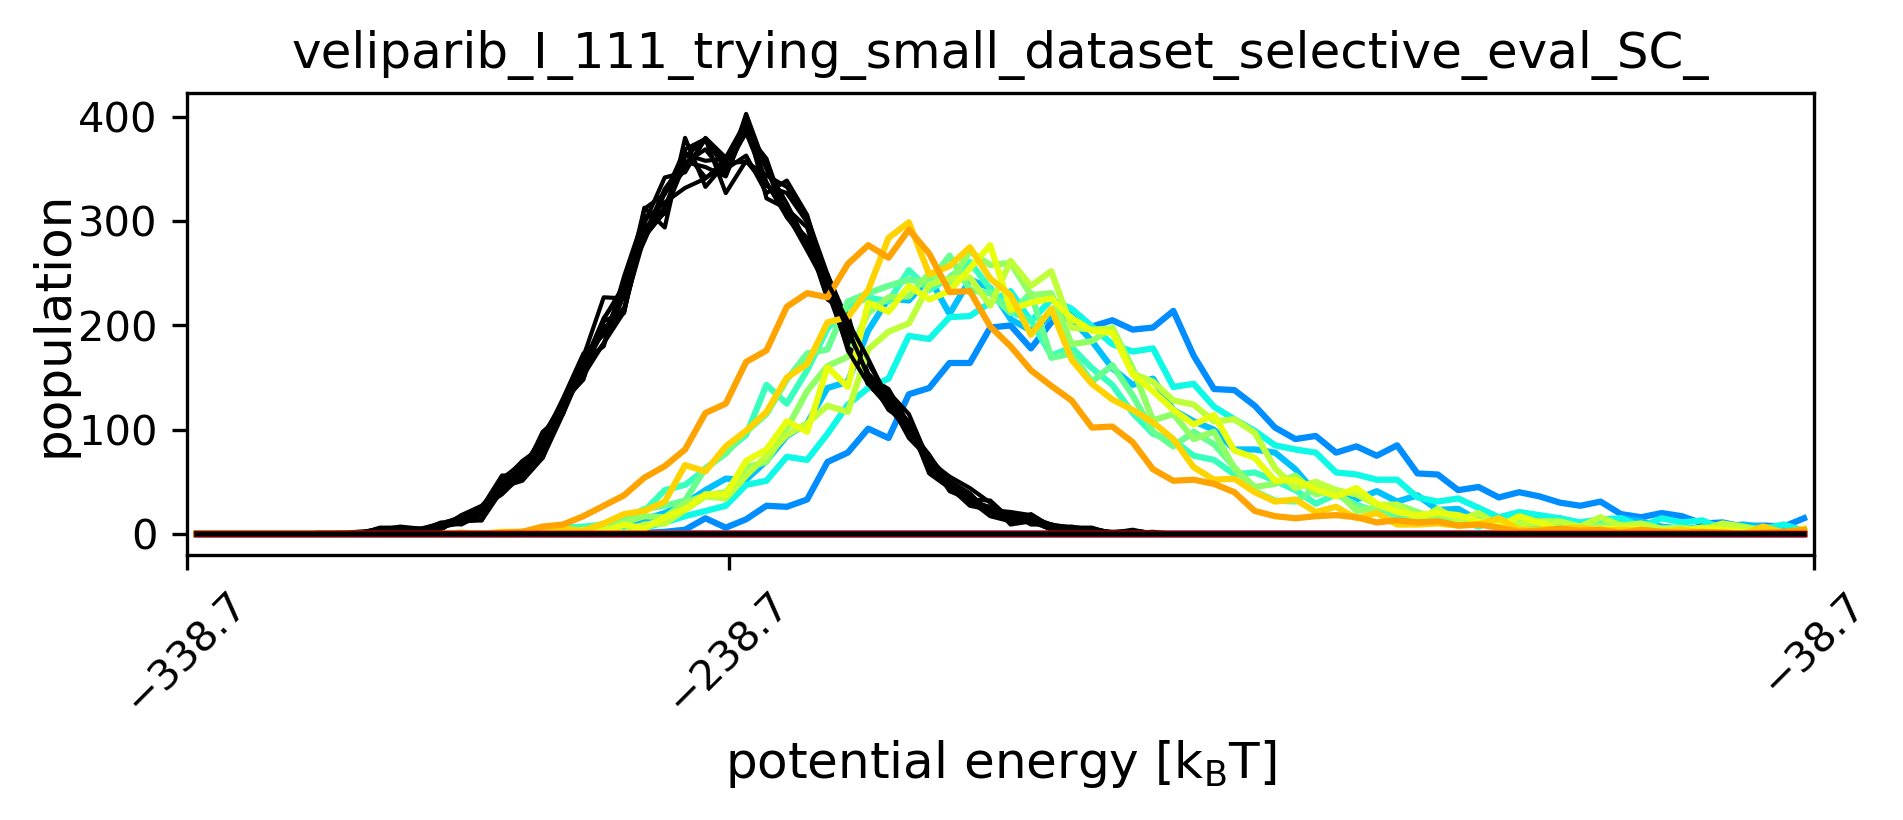

In [29]:
_range = [nn.nns[0].u_mean-100, nn.nns[0].u_mean+200]
nn.plot_energies_during_training_(0, _range=_range)
plt.xlim(*_range)

# testing remote energy evalautions:

## Three datasets here as an example:

In [10]:
############################################################################################

name_of_the_test = 'checking_this'
n_states = 3

ind_rO = 4 ; option = 2
n_mol_unitcells = [4,4,4] # this is for gamma Form but ok to use in others also

from O.interface import *

In [4]:
list_r  = []
list_b0 = []
list_u  = []
list_u_ = []
single_mol_pdb_file = None

paths_datasets = [
'./O/MM/GAFF_sc/succinic_acid/data/succinic_acid_dataset_Ae_NVT_cell_222_CUT',
'./O/MM/GAFF_sc/succinic_acid/data/succinic_acid_dataset_Be_NVT_cell_222_CUT',
'./O/MM/GAFF_sc/succinic_acid/data/succinic_acid_dataset_G_NVT_cell_221_CUT',
]

for dataset_path in paths_datasets:
    sc = SingleComponent.initialise_from_save_(dataset_path)
    
    list_r.append(sc.xyz)
    b = sc.boxes.astype(np.float32) ; b0 = b[-1] ; assert np.abs(b[0] - b0).max() < 0.0000001
    list_b0.append(b0)
    list_u.append(sc.u)
    list_u_.append(sc.u_)
    single_mol_pdb_file = sc._single_mol_pdb_file_
    
    del sc

    print('r shape:', list_r[-1].shape)
    print('b0 shape:', list_b0[-1].shape)
    print('u shape:', list_u[-1].shape)


initialising from saved dataset: ./O/MM/GAFF_sc/succinic_acid/data/succinic_acid_dataset_Ae_NVT_cell_222_CUT
# initialise_object (SingleComponent) with GAFF FF, from the input file (PDB):
 ./O//MM/GAFF_sc/succinic_acid/succinic_acid_Ae_equilibrated_v2_cell_222.pdb
n_molecules: 16

# initialise_system:
set PME cutoff to: 0.36 nm
removeCMMotion active: True

__ changing n_mol in top: ________________________________
in the /mnt/c/Users/User/Desktop/FEcrys/O/MM/GAFF_sc/succinic_acid/misc/x_succinic_acid_gmx.top
replaced 1 line ( 165 ) 
 from: 
     UNK                  1
 to 
     UNK                  16
these changes were written into file: /mnt/c/Users/User/Desktop/FEcrys/O/MM/GAFF_sc/succinic_acid/misc/x_x_succinic_acid_gmx.top
__________________________________________________________

set SwitchingFunction to 0.95 * PME_cutoff = 0.34199999999999997 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
no corrections to self.system
n_mol =  16, n_atoms_mol = 14, N = 224, n_DOF = 669 (

# Training:

In [12]:
nn = NN_interface_sc_multimap_selective_evaluation_( 
                                                    
                                                    name = name_of_the_test,
                                                    n_states = n_states,

                                                    list_r  = list_r,
                                                    list_b0 = list_b0,
                                                    list_u  = list_u,
                                                    list_u_ = list_u_,
                                                    single_mol_pdb_file = single_mol_pdb_file,

                                                    training = True,

                                                    fraction_training =  0.8,
                                                    running_in_notebook = True,
                                                    )
    

In [5]:
nn.set_ic_map_step1(ind_root_atom=ind_rO, option=option)
nn.set_ic_map_step2(check_PES=True)
nn.set_ic_map_step3(n_mol_unitcells=n_mol_unitcells)
nn.set_model(n_layers = 4, learning_rate=0.001, n_att_heads=4,
             evaluation_batch_size=5000)

molecule with 14 atoms, of which 8 are heavy atoms, and the rest are 6 hydrogens.
atoms with incides [4, 11, 3] are set to be the Cartesian_Block
position of the molecule specified by atoms with index: 4
rotation of the molecule specified by atoms with indices: [11, 3]
conformation of the molecule specified by all other atoms.
molecule with 14 atoms, of which 8 are heavy atoms, and the rest are 6 hydrogens.
atoms with incides [4, 11, 3] are set to be the Cartesian_Block
position of the molecule specified by atoms with index: 4
rotation of the molecule specified by atoms with indices: [11, 3]
conformation of the molecule specified by all other atoms.
molecule with 14 atoms, of which 8 are heavy atoms, and the rest are 6 hydrogens.
atoms with incides [4, 11, 3] are set to be the Cartesian_Block
position of the molecule specified by atoms with index: 4
rotation of the molecule specified by atoms with indices: [11, 3]
conformation of the molecule specified by all other atoms.
COM removed f

In [6]:
nn.set_trainer(n_batches_between_evaluations=50)

'92.89 999 999 19 AVMD_T:[-20.26573385 -19.87936598 -20.11500333] AVMD_V:[-20.621540271773238, -20.621540271773238, -20.621540271773238] || FE:[0.0, 0.0, 0.0] SD:[0.0, 0.0, 0.0]'

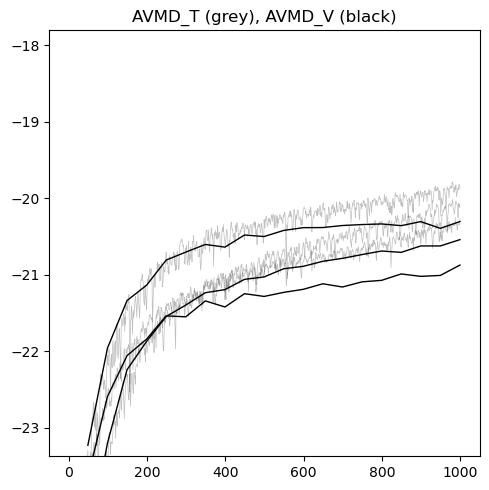

training time so far: 93.32 minutes
saved ./O//NN/training_results/misc/checking_this_SC__misc_
misc training outputs were saved


In [7]:
nn.train(   n_batches = 1000,
            f_halfwindow_visualisation = [2.5, 1.],
        )

In [13]:
nn.load_misc_()

In [9]:
nn.solve_BAR_using_pymbar_(n_selective_evalautions=5)


two-state BAR evaluation in macrostate 0:
evaluation batch 19: evaluating potential energies on model samples. The estimate will be saved.



******* JAX 64-bit mode is now on! *******
*     JAX is now set to 64-bit mode!     *
*   This MAY cause problems with other   *
*      uses of JAX in the same code.     *
******************************************

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


evaluation batch 16: evaluating potential energies on model samples. The estimate will be saved.
evaluation batch 18: evaluating potential energies on model samples. The estimate will be saved.
evaluation batch 17: evaluating potential energies on model samples. The estimate will be saved.
evaluation batch 15: evaluating potential energies on model samples. The estimate will be saved.
saved ./O//NN/training_results/BAR/checking_this_SC__BAR__BAR_output_crystal_index=0
saved BAR result

two-state BAR evaluation in macrostate 1:
evaluation batch 19: evaluating potential energies on model samples. The estimate will be saved.
evaluation batch 17: evaluating potential energies on model samples. The estimate will be saved.
evaluation batch 15: evaluating potential energies on model samples. The estimate will be saved.
evaluation batch 14: evaluating potential energies on model samples. The estimate will be saved.
evaluation batch 13: evaluating potential energies on model samples. The estima

     grid search estimate (kT) : 0.0              +/- standard deviation : 0.0                      
     final pymbar result  (kT) : -19.3812         +/- standard error     : 0.061       
     grid search estimate (kT) : 0.0              +/- standard deviation : 0.0                      
     final pymbar result  (kT) : -18.8209         +/- standard error     : 0.0494      
     grid search estimate (kT) : 0.0              +/- standard deviation : 0.0                      
     final pymbar result  (kT) : -18.7962         +/- standard error     : 0.065       


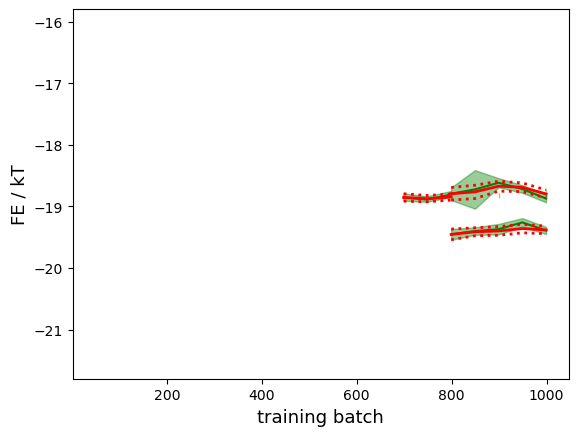

In [15]:
nn.plot_result_(0, n_mol=16)
nn.plot_result_(1, n_mol=16)
nn.plot_result_(2, n_mol=16, window=3)

In [11]:
# optional:
# nn.save_model_()
# nn.save_samples_(10000)

saved ./O//NN/training_results/fitted_models/checking_this_SC__model_
saved ./O//NN/training_results/samples/checking_this_SC__samples__crystal_index=0
saved ./O//NN/training_results/samples/checking_this_SC__samples__crystal_index=1
saved ./O//NN/training_results/samples/checking_this_SC__samples__crystal_index=2


## restarting the notebook and initialising nn only with the name_of_the_test allows to plot currently saved results:

In [16]:
name_of_the_test = 'checking_this'
n_states = 3

from O.interface import *

In [17]:
nn = NN_interface_sc_multimap_selective_evaluation_( 
                                                    name = name_of_the_test,
                                                    n_states = n_states,
                                                    training = False,
                                                    running_in_notebook = True,
                                                    )

In [18]:
nn.load_misc_()

In [18]:
nn.solve_BAR_using_pymbar_(n_selective_evalautions=5)

found saved BAR result
rerun = True

two-state BAR evaluation in macrostate 0:
saved ./O//NN/training_results/BAR/checking_this_SC__BAR__BAR_output_crystal_index=0
saved BAR result
found saved BAR result
rerun = True

two-state BAR evaluation in macrostate 1:
saved ./O//NN/training_results/BAR/checking_this_SC__BAR__BAR_output_crystal_index=1
saved BAR result
found saved BAR result
rerun = True

two-state BAR evaluation in macrostate 2:
saved ./O//NN/training_results/BAR/checking_this_SC__BAR__BAR_output_crystal_index=2
saved BAR result


     grid search estimate (kT) : 0.0              +/- standard deviation : 0.0                      
     final pymbar result  (kT) : -19.3812         +/- standard error     : 0.061       
     grid search estimate (kT) : 0.0              +/- standard deviation : 0.0                      
     final pymbar result  (kT) : -18.8209         +/- standard error     : 0.0494      
     grid search estimate (kT) : 0.0              +/- standard deviation : 0.0                      
     final pymbar result  (kT) : -18.7962         +/- standard error     : 0.065       


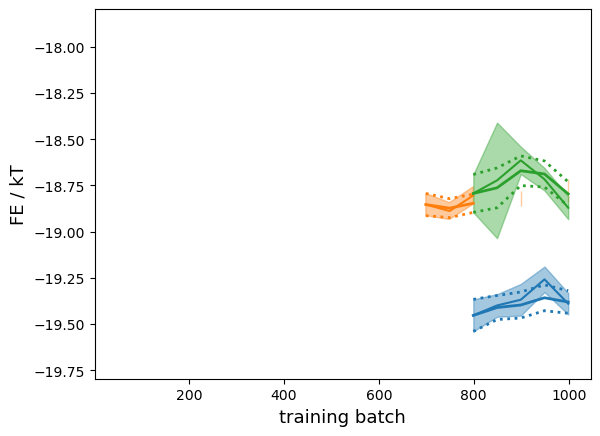

In [20]:
[nn.plot_result_(k, n_mol=16, colors=[f'C{k}']*4) for k in range(n_states)];

In [12]:
nn.load_energies_during_training_()

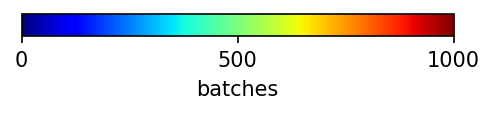

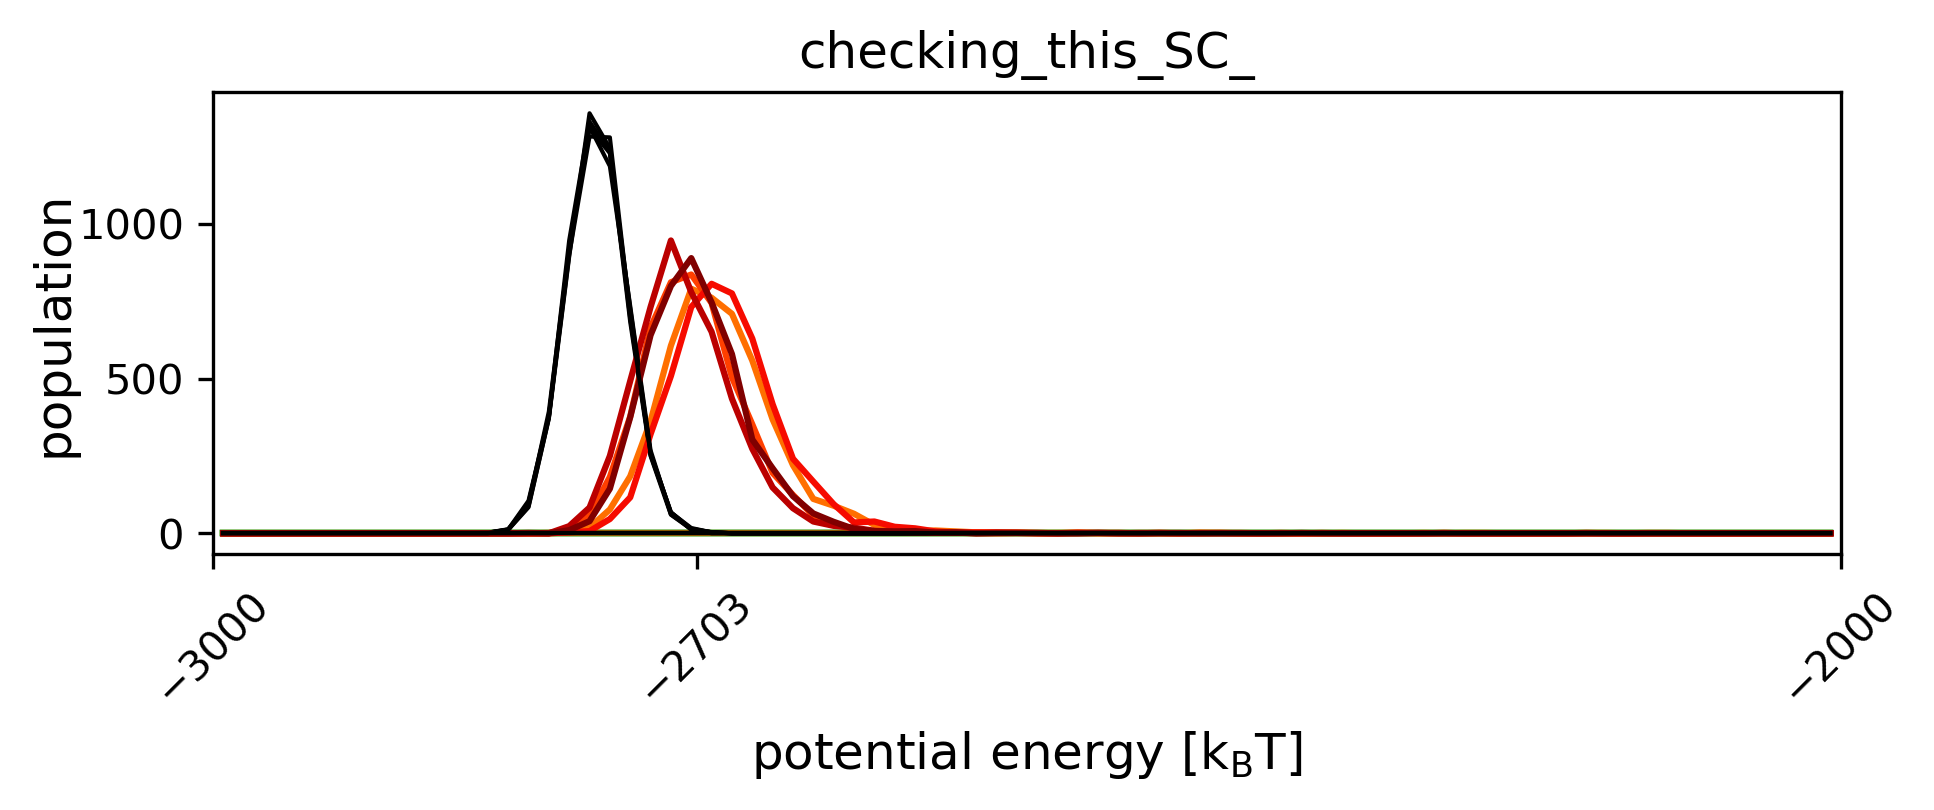

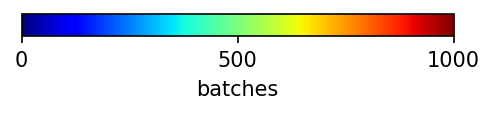

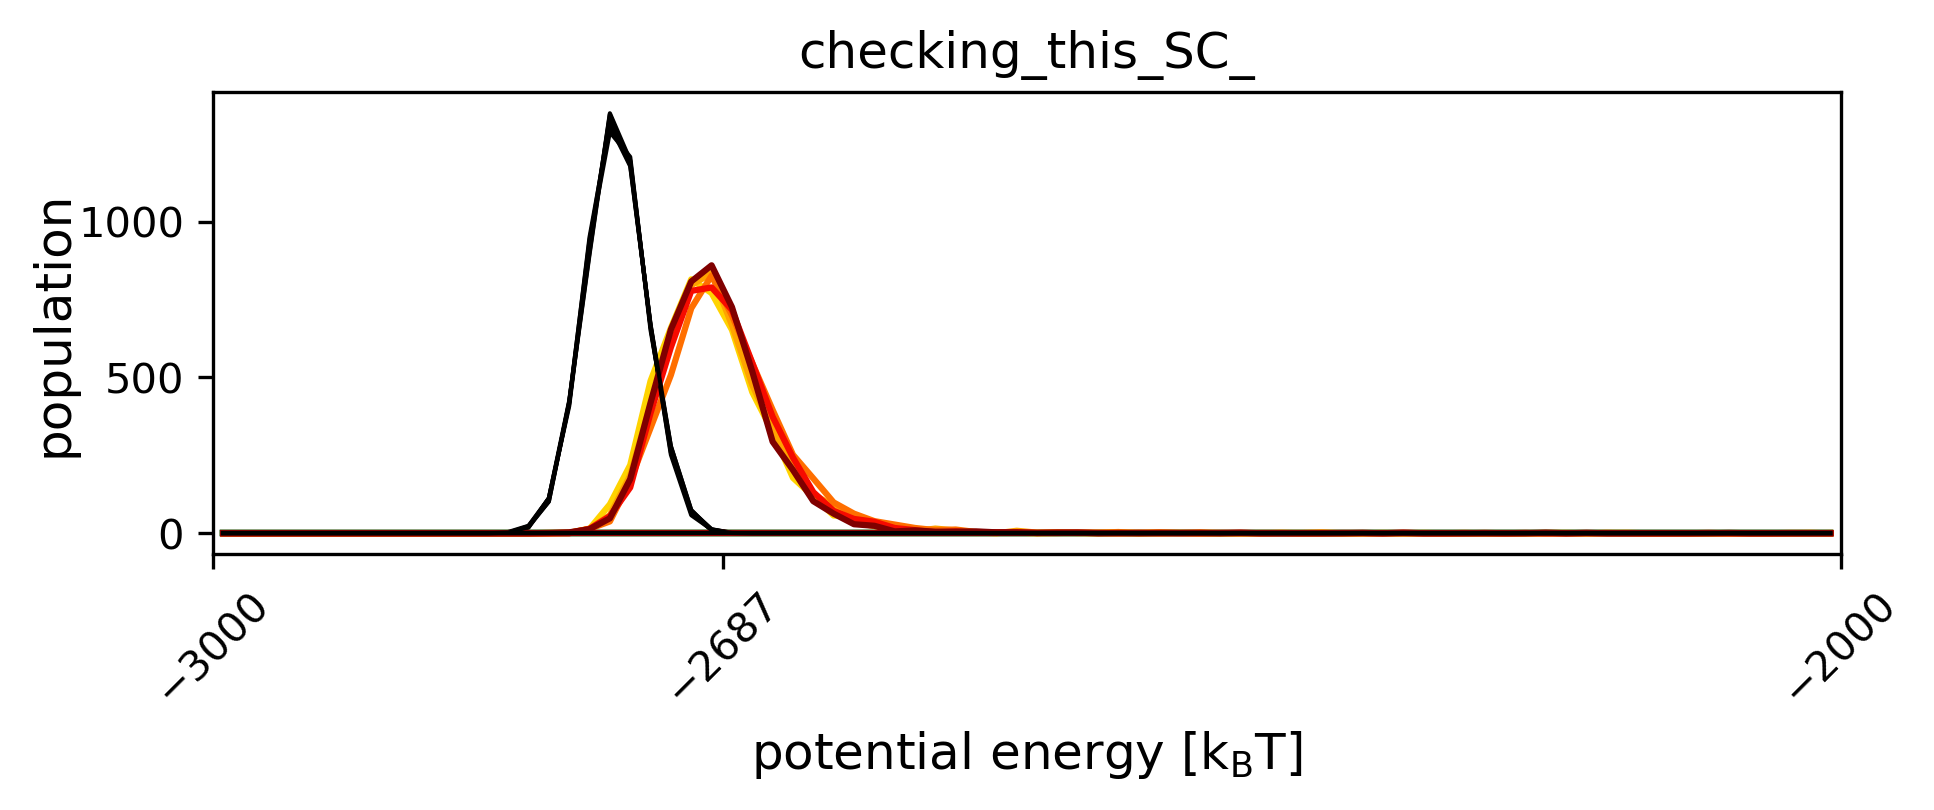

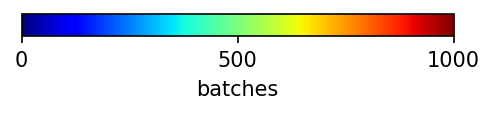

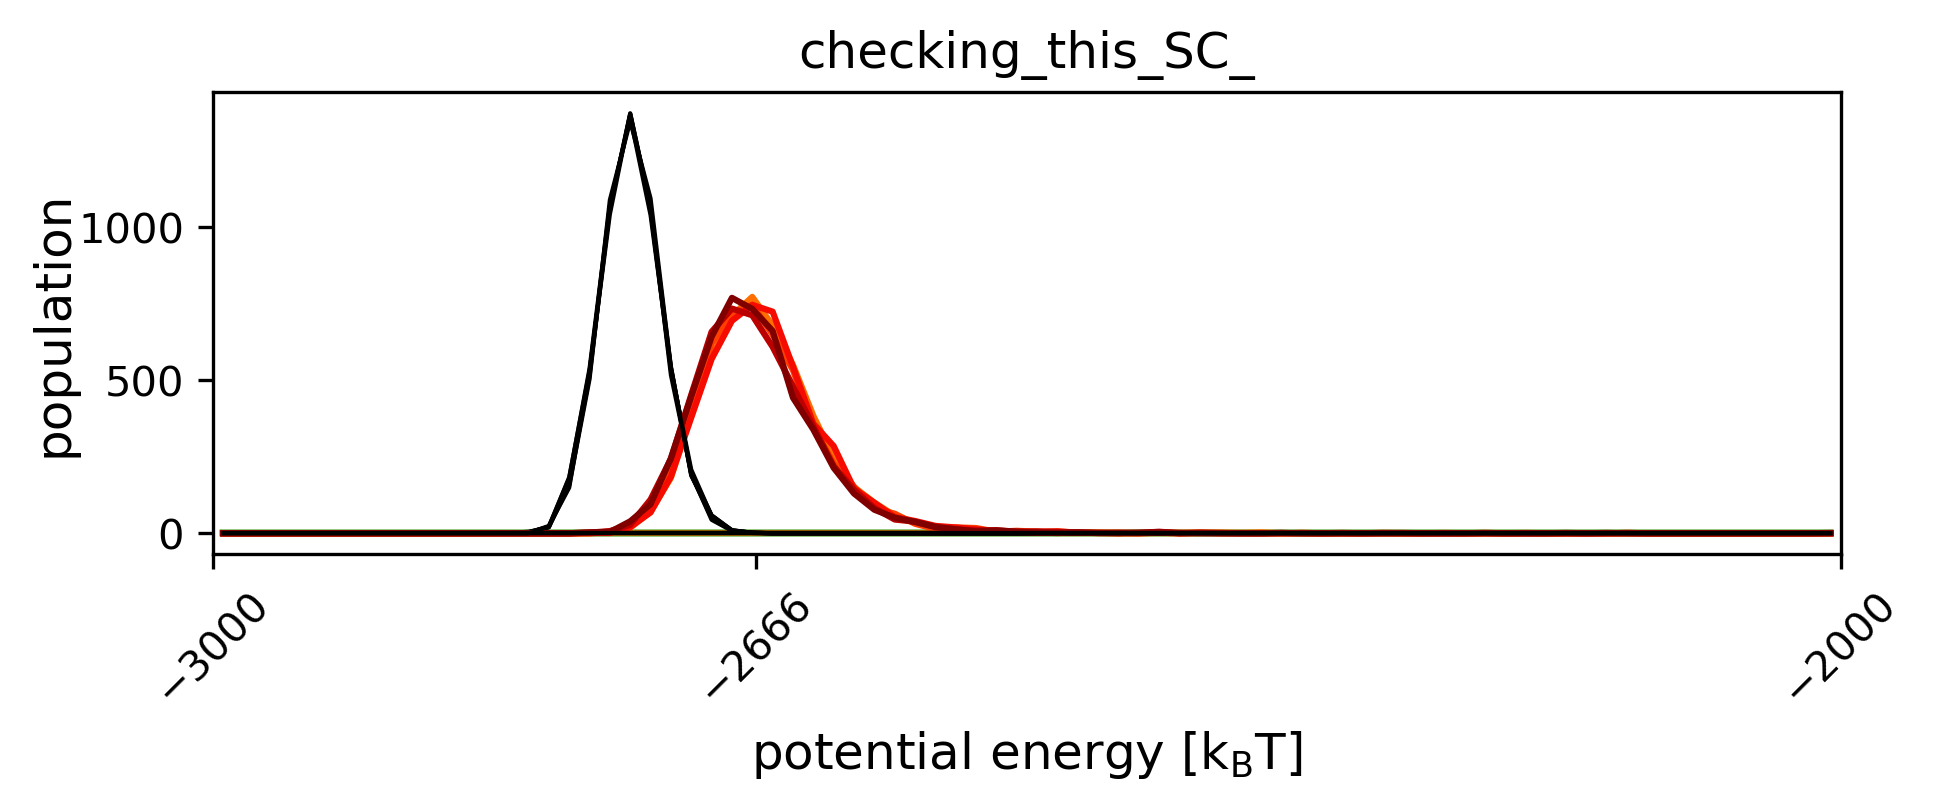

In [16]:
nn.plot_energies_during_training_(0, _range=[-3000,-2000])
nn.plot_energies_during_training_(1, _range=[-3000,-2000])
nn.plot_energies_during_training_(2, _range=[-3000,-2000])

## restarting the notebook and initialising nn again with the list of potential energy function + name_of_the_test, allows to add more evaluations, and plots results:

In [21]:
name_of_the_test = 'checking_this'
n_states = 3
#list_u_ = [u0_, u1_, u2_]

from O.interface import *

In [22]:
nn = NN_interface_sc_multimap_selective_evaluation_( 
                                                    name = name_of_the_test,
                                                    n_states = n_states,
                                                    list_u_ = list_u_,
                                                    training = False,
                                                    running_in_notebook = True,
                                                    )

In [23]:
nn.load_misc_()

In [11]:
nn.solve_BAR_using_pymbar_(n_selective_evalautions=10)

found saved BAR result
rerun = True

two-state BAR evaluation in macrostate 0:
evaluation batch 14: evaluating potential energies on model samples. The estimate will be saved.



******* JAX 64-bit mode is now on! *******
*     JAX is now set to 64-bit mode!     *
*   This MAY cause problems with other   *
*      uses of JAX in the same code.     *
******************************************

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


evaluation batch 12: evaluating potential energies on model samples. The estimate will be saved.
evaluation batch 13: evaluating potential energies on model samples. The estimate will be saved.
evaluation batch 11: evaluating potential energies on model samples. The estimate will be saved.
evaluation batch 10: evaluating potential energies on model samples. The estimate will be saved.
saved ./O//NN/training_results/BAR/checking_this_SC__BAR__BAR_output_crystal_index=0
saved BAR result
found saved BAR result
rerun = True

two-state BAR evaluation in macrostate 1:
evaluation batch 16: evaluating potential energies on model samples. The estimate will be saved.
evaluation batch 12: evaluating potential energies on model samples. The estimate will be saved.
evaluation batch 11: evaluating potential energies on model samples. The estimate will be saved.
evaluation batch 18: evaluating potential energies on model samples. The estimate will be saved.
evaluation batch 10: evaluating potential e

     grid search estimate (kT) : 0.0              +/- standard deviation : 0.0                      
     final pymbar result  (kT) : -19.3796         +/- standard error     : 0.0618      
     grid search estimate (kT) : 0.0              +/- standard deviation : 0.0                      
     final pymbar result  (kT) : -18.8235         +/- standard error     : 0.0518      
     grid search estimate (kT) : 0.0              +/- standard deviation : 0.0                      
     final pymbar result  (kT) : -18.7958         +/- standard error     : 0.0659      


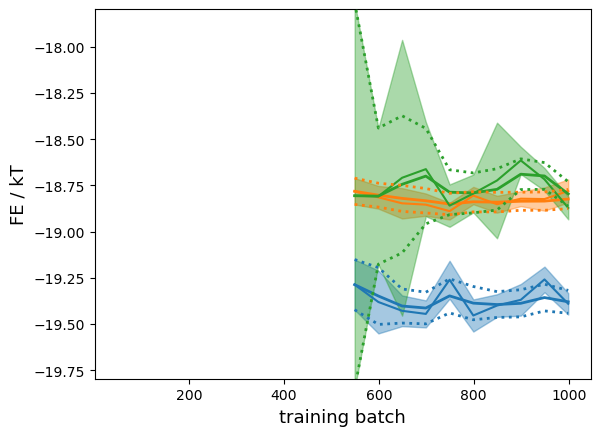

In [25]:
[nn.plot_result_(k, n_mol=16, colors=[f'C{k}']*4) for k in range(n_states)];